# Neural Network

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

2024-07-08 12:59:46.694802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/dusanbaek/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


time: 8.77 s (started: 2024-07-08 12:59:42 +09:00)


In [5]:
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0
time: 685 µs (started: 2024-07-08 12:59:54 +09:00)


In [6]:
# !pip3 install ipython-autotime

time: 219 µs (started: 2024-07-08 12:59:55 +09:00)


In [7]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 708 µs (started: 2024-07-08 12:59:57 +09:00)


# 1. 데이터 준비

In [8]:
X_train = np.array([1,2,3,4,5,6])
y_train = np.array([9,12,15,18,21,24])

time: 597 µs (started: 2024-07-08 13:00:00 +09:00)


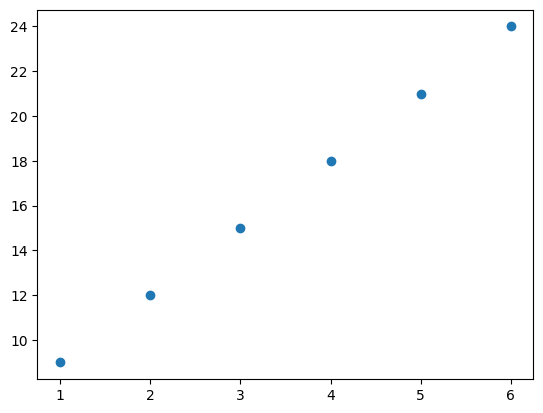

time: 306 ms (started: 2024-07-08 13:00:01 +09:00)


In [9]:
plt.scatter(X_train, y_train)
plt.show()

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

time: 1.01 s (started: 2024-07-08 13:00:03 +09:00)


In [11]:
lr = LinearRegression()
X_train = X_train.reshape(-1,1)
lr.fit(X_train, y_train)

LinearRegression()

time: 11.3 ms (started: 2024-07-08 13:00:05 +09:00)


In [12]:
X_train.shape, y_train.shape

((6, 1), (6,))

time: 2.97 ms (started: 2024-07-08 13:00:34 +09:00)


In [13]:
lr.coef_, lr.intercept_

(array([3.]), 5.999999999999998)

time: 2.71 ms (started: 2024-07-08 13:00:35 +09:00)


## NN model

In [14]:
from keras import layers

model = keras.Sequential(
    layers.Dense(units=1, input_shape=(1,))
)

time: 85.7 ms (started: 2024-07-08 13:00:42 +09:00)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 8.08 ms (started: 2024-07-08 13:00:45 +09:00)


In [16]:
# mse: mean squared error
# mae: mean absolute error

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']

)

time: 32 ms (started: 2024-07-08 13:03:33 +09:00)


In [17]:
model.fit(
    X_train, y_train,
    epochs= 1000,
    batch_size=len(X_train)
)

Epoch 1/1000
1/1 [==============================] - 0s 385ms/step - loss: 261.9008 - mse: 261.9008
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 261.7455 - mse: 261.7455
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 261.5902 - mse: 261.5902
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 261.4349 - mse: 261.4349
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 261.2797 - mse: 261.2797
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 261.1245 - mse: 261.1245
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 260.9695 - mse: 260.9695
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 260.8144 - mse: 260.8144
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 260.6594 - mse: 260.6594
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 260.5044 - mse: 260.5044
Epoch 11/1000
1/1 [========

time: 9.74 s (started: 2024-07-08 13:03:44 +09:00)


In [18]:
model.get_weights()

[array([[1.2157211]], dtype=float32), array([0.93389446], dtype=float32)]

time: 5.24 ms (started: 2024-07-08 13:04:01 +09:00)


In [19]:
y_pred = model.predict([[10], [5], [1]])

1/1 [==============================] - 0s 87ms/step
time: 137 ms (started: 2024-07-08 13:04:04 +09:00)


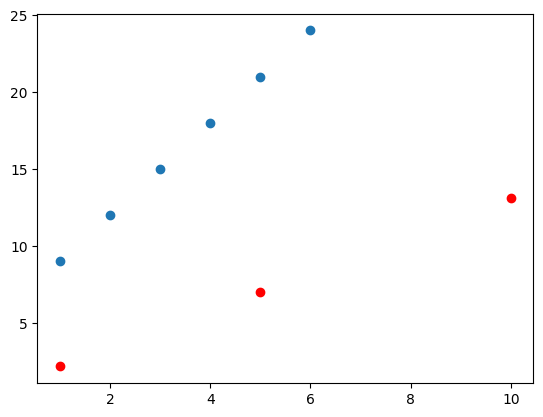

time: 138 ms (started: 2024-07-08 13:04:06 +09:00)


In [20]:
plt.scatter(X_train, y_train)
plt.scatter([10, 5, 1], y_pred, c='r')
plt.show()